In [36]:
import pandas as pd
import numpy as np

In [37]:
df=pd.read_csv("/content/cleaned_data.csv")
df.head(5)

,job_link,job_title,company_name,city,state,posted_on (days ago),job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",Telangana,30,Processing confidential and information accor...,Indeed,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Gujarat,0,"Must have worked in office, analyzing or acco...",Indeed,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,Chennai,Tamil Nadu,21,"4.Other Financial related activities.,Total wo...",Indeed,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",Haryana,5,You will be responsible for managing our maste...,Indeed,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",Maharashtra,4,1+ years’ work experience with proven knowledg...,Indeed,0,0,0,0,0,0,0,0


In [38]:
df.shape

(3109, 16)

In [5]:
df = df[['job_title','company_name','city','excel','python','ML','SQL','R_language','statistics','NLP','BI tools']]

In [6]:
df.isnull().sum()

job_title       0
company_name    0
city            0
excel           0
python          0
ML              0
SQL             0
R_language      0
statistics      0
NLP             0
BI tools        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     3109 non-null   object
 1   company_name  3109 non-null   object
 2   city          3109 non-null   object
 3   excel         3109 non-null   int64 
 4   python        3109 non-null   int64 
 5   ML            3109 non-null   int64 
 6   SQL           3109 non-null   int64 
 7   R_language    3109 non-null   int64 
 8   statistics    3109 non-null   int64 
 9   NLP           3109 non-null   int64 
 10  BI tools      3109 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 267.3+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df['city'] = le.fit_transform(df['city'])
df['job_title']= le.fit_transform(df['job_title'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     3109 non-null   int64 
 1   company_name  3109 non-null   object
 2   city          3109 non-null   int64 
 3   excel         3109 non-null   int64 
 4   python        3109 non-null   int64 
 5   ML            3109 non-null   int64 
 6   SQL           3109 non-null   int64 
 7   R_language    3109 non-null   int64 
 8   statistics    3109 non-null   int64 
 9   NLP           3109 non-null   int64 
 10  BI tools      3109 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 267.3+ KB


In [14]:
df.head(5)

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,1432,NxtWave Disruptive Technologies Private Limited,46,0,0,0,0,0,0,0,0
1,158,NORWOOD INN & SUITES,155,0,0,0,0,0,0,0,0
2,263,Smart Moves,17,0,0,0,0,0,0,0,0
3,318,Tealfeed,146,0,0,0,1,0,0,0,0
4,511,Fluidonomics Solutions LLP,136,0,0,0,0,0,0,0,0


In [18]:
X=df[['job_title','city','excel','python',	'ML','SQL','R_language','statistics','NLP','BI tools']]

In [19]:
X.isnull().sum()

job_title     0
city          0
excel         0
python        0
ML            0
SQL           0
R_language    0
statistics    0
NLP           0
BI tools      0
dtype: int64

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42,algorithm='elkan',init='k-means++').fit(X)

In [21]:
df['Clusters'] = kmeans.labels_

In [22]:
X

,job_title,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,1432,46,0,0,0,0,0,0,0,0
1,158,155,0,0,0,0,0,0,0,0
2,263,17,0,0,0,0,0,0,0,0
3,318,146,0,0,0,1,0,0,0,0
4,511,136,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3104,821,4,0,0,0,0,0,0,0,0
3105,406,130,0,0,0,0,0,0,0,0
3106,149,4,0,0,0,0,0,0,0,0
3107,212,91,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


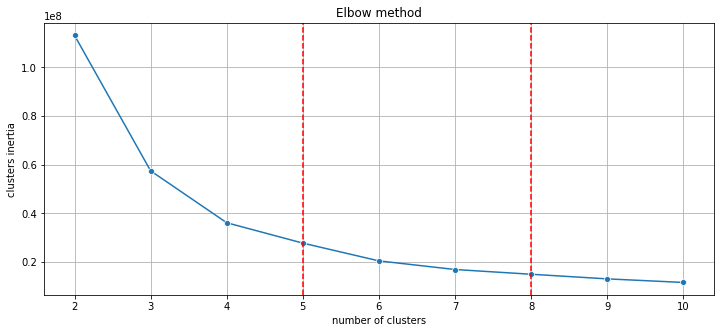

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM_est.labels_)
    s_scores.append(silhouette_avg)
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(8, ls="--", c="red")
plt.grid()
plt.show()

In [24]:
X['Cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


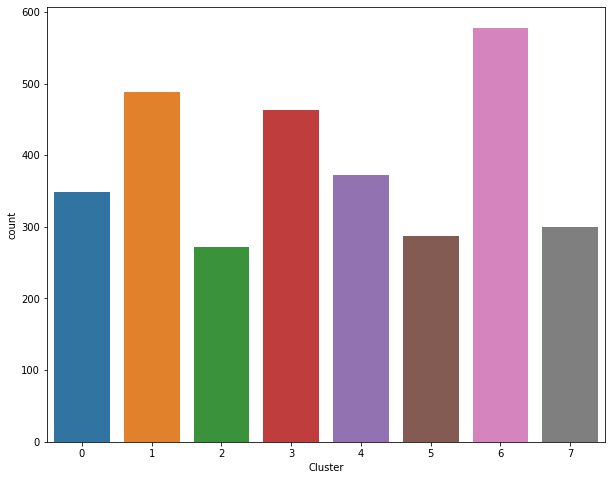

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(X['Cluster'])
plt.show()

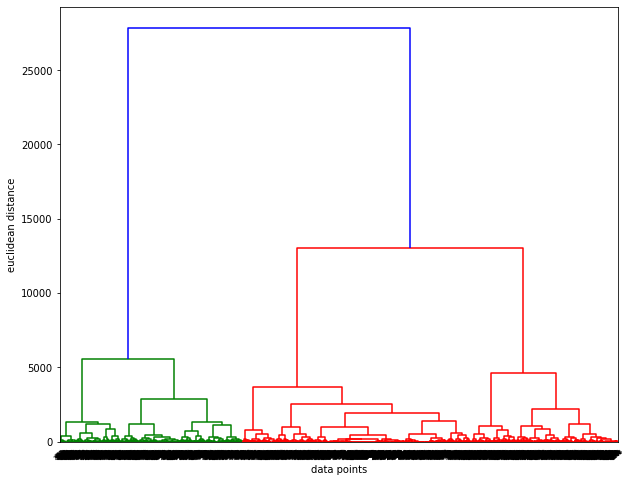

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(X.iloc[:,0:-1],method="ward")
plt.figure(figsize=(10,8))
dendrogram(merg,leaf_rotation = 40)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

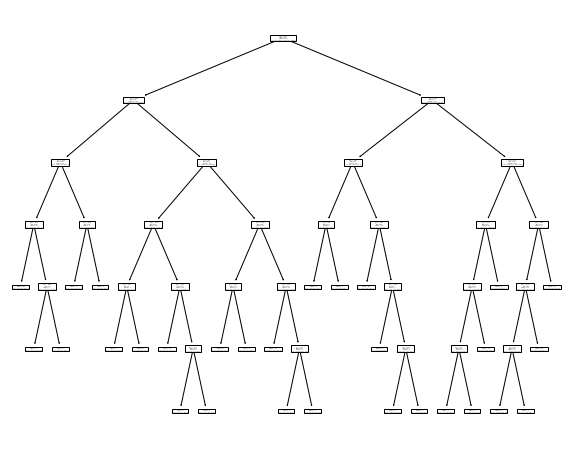

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X.iloc[:,0:-1].values,X['Cluster'].values) 

from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

In [28]:
Cluster1 = df[df['Clusters'] == 0]
Cluster2 = df[df['Clusters'] == 1]
Cluster3 = df[df['Clusters'] == 2]
Cluster4 = df[df['Clusters'] == 3]
Cluster5 = df[df['Clusters'] == 4]
Cluster6 = df[df['Clusters'] == 5]
Cluster7 = df[df['Clusters'] == 6]
Cluster8 = df[df['Clusters'] == 7]

In [29]:
Cluster1

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
1,158,NORWOOD INN & SUITES,155,0,0,0,0,0,0,0,0,0
3,318,Tealfeed,146,0,0,0,1,0,0,0,0,0
5,404,HowToAbroad,142,0,0,0,0,0,0,0,0,0
7,263,FirstCry.com,136,0,0,0,0,0,0,0,0,0
11,225,MS Clinical Research (P) Ltd,144,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,195,jatland,120,0,0,0,0,0,0,0,0,0
3090,263,milestone internet marketing pvt ltd,91,0,0,0,0,0,0,0,0,0
3100,263,UBS Business Solutions,93,0,0,0,0,0,0,0,0,0
3105,406,Capgemini,130,0,0,0,0,0,0,0,0,0


In [30]:
Cluster2

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
12,1056,SBT Research Pvt Ltd,136,0,0,0,0,0,0,0,0,1
15,1050,Credible Markets,136,0,0,0,0,0,0,0,0,1
16,1050,Finquest,7,0,0,0,0,0,0,0,0,1
17,1059,M.s.kothari & associates,101,0,0,0,0,0,0,0,0,1
20,1057,SECRET TECHNOLOGIES INDIA VMS GROUP,154,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3065,1229,Walmart,4,0,0,0,0,0,0,0,0,1
3072,1201,SAP India Pvt.Ltd,4,0,0,0,0,0,0,0,0,1
3081,1165,ReSource Pro Operational Solutions Pvt Ltd.,4,0,0,0,0,0,0,0,0,1
3084,1168,idfc first bank,92,0,0,0,0,0,0,0,0,1


In [31]:
Cluster3

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
27,699,Analytics Squad,124,0,0,0,0,0,0,0,0,2
38,676,Macayla India,59,0,0,0,0,0,0,0,0,2
42,771,The Hiring Master,21,0,0,0,0,0,0,0,0,2
45,676,Mount Intra Finance Pvt Ltd,75,0,0,0,0,0,0,0,0,2
54,657,PKF Group,61,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3069,624,Better Reports,191,0,0,0,0,0,0,0,0,2
3074,625,Better Reports,142,0,0,0,0,0,0,0,0,2
3076,786,"GlobalSoft, Inc.",4,0,0,0,0,0,0,0,0,2
3082,688,Moody's,4,0,0,0,0,0,0,0,0,2


In [32]:
Cluster4

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
4,511,Fluidonomics Solutions LLP,136,0,0,0,0,0,0,0,0,3
10,610,RADcube,46,0,0,0,0,0,0,0,0,3
21,601,Appitsimple Infotek Pvt. Ltd,142,0,0,0,0,0,0,0,0,3
29,477,Vamstar,76,0,0,0,0,0,0,0,0,3
36,524,Invogue Creations,101,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3078,502,Allegis Services India Pvt. Ltd.,4,0,0,0,0,0,0,0,0,3
3079,502,Allegis Services India Pvt. Ltd.,4,0,0,0,0,0,0,0,0,3
3080,616,GSK India,4,0,0,0,0,0,0,0,0,3
3088,444,Coforge,91,0,0,0,0,0,0,0,0,3


In [33]:
Cluster5

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
25,842,Universal Data Solution,124,0,0,0,0,0,0,0,0,4
34,830,Indian Essential,136,0,0,0,0,0,0,0,0,4
40,1017,T&N Business Services Pvt. Ltd.,34,0,0,0,0,0,0,0,0,4
58,994,Svartglae Business Services,88,0,0,0,0,0,0,0,0,4
60,1003,Otipy,34,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3043,991,GR Infotech,17,0,0,0,0,0,0,0,0,4
3071,958,Accenture,47,0,0,0,1,0,0,0,0,4
3075,1005,Invesco (India) Pvt Ltd,47,0,0,0,0,0,0,0,0,4
3103,822,AVANA Capital,4,0,0,0,0,0,0,0,0,4


In [34]:
Cluster6

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
22,180,Mak Technolabs Pvt Ltd,59,0,0,0,0,0,0,0,0,5
35,156,Kyvor Genomics Pvt Ltd,17,0,0,0,0,0,0,0,0,5
39,101,enVista Consulting and Innovative Technology...,46,0,0,0,0,0,0,0,0,5
43,163,Belora Paris,34,0,0,0,0,0,0,0,0,5
50,13,mStack Inc,150,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3063,32,Altisource Business Solutions Pvt Ltd,4,0,0,0,0,0,0,0,0,5
3064,138,Paytm,91,0,0,0,0,0,0,0,0,5
3073,93,Abbott,92,0,0,0,0,0,0,0,0,5
3077,150,Cyient,91,0,0,0,0,0,0,0,0,5


In [35]:
Cluster7

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
2,263,Smart Moves,17,0,0,0,0,0,0,0,0,6
6,263,Wyzmindz solutions pvt ltd,7,0,0,0,0,0,0,0,0,6
8,349,Client of SANUMAS Solutions,20,0,0,0,0,0,0,0,0,6
9,263,Quarks Technosoft,7,1,0,0,0,0,0,0,0,6
19,263,Mitsogo Inc,17,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3098,263,Myntra,4,0,0,0,0,0,0,0,0,6
3099,263,Myntra,4,0,0,0,0,0,0,0,0,6
3101,263,Allegis Services India Pvt. Ltd.,4,0,0,0,0,0,0,0,0,6
3102,263,Plum,4,0,0,0,0,0,0,0,0,6


In [48]:
Cluster8

,job_title,company_name,city,excel,python,ML,SQL,R_language,statistics,NLP,BI tools,Clusters
0,1432,NxtWave Disruptive Technologies Private Limited,46,0,0,0,0,0,0,0,0,7
32,1387,Dots Connect,146,1,0,0,1,0,0,0,0,7
85,1437,WPP IT,17,0,0,0,0,0,0,0,0,7
127,1344,GreenTick Value Services Pvt. Ltd.,7,0,0,0,0,0,0,0,0,7
146,1435,Ipower Softwares,1,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3062,1235,Azuga Telematics,4,0,0,0,0,0,0,0,0,7
3066,1283,Philips India Limited,4,0,0,0,0,0,0,0,0,7
3067,1275,Infineon Technologies Pvt Ltd,4,0,0,0,0,0,0,0,0,7
3068,1313,Infineon Technologies Pvt Ltd,4,0,0,0,0,0,0,0,0,7
